# Preprocesamiento y Análisis de Datos

En este cuaderno, encontrarás todo el código necesario para llevar a cabo un análisis exploratorio de datos con el propósito de caracterizarlos. También, evaluaremos el equilibrio del conjunto de datos y determinaremos el método más adecuado para preparar los datos y construir un modelo con la máxima eficiencia.

In [1]:
# Importar librerpias necesarias para ejecución del código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.legend import Collection

#Clasificación
import sklearn
from sklearn.decomposition import PCA #Libreria para aplicar PCA

import seaborn as sns


/tmp/ipykernel_39442/3262306843.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'sklearn'

## Dataset original
En esta sección, realizamos la **visualización de los datos originales** del dataset [**land+mines-1**](https://archive.ics.uci.edu/dataset/763/land%2Bmines-1) con el propósito de iniciar un análisis de la distribución de los datos.


In [165]:
#Lectura de el archivo
archivo = 'Mine_Dataset.xls'
data=pd.read_excel(archivo,  sheet_name='Normalized_Data')
data

,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
...,...,...,...,...
333,0.323262,0.909091,0.4,5
334,0.444108,0.181818,1.0,5
335,0.353474,0.454545,1.0,5
336,0.362537,0.727273,1.0,5


In [178]:
# Conteo de cada clase para descripción del dataset
print("Contedo de muestras de cada clase")
print(data['M'].value_counts())
#Medidas estadisticas:
print("Promedio:",np.mean(np.array(data['M'].value_counts())))
print("Desviación",np.std(data['M'].value_counts()))
print("Máximo:",np.max(data['M'].value_counts()))
print("Minimo:",np.min(data['M'].value_counts()))

Contedo de muestras de cada clase
1    71
2    70
3    66
4    66
5    65
Name: M, dtype: int64
Promedio: 67.6
Desviación 2.416609194718914
Máximo: 71
Minimo: 65


Se puede observar que los datos están balanceados, ya que no se aprecia una disparidad significativa en la cantidad de muestras para cada categoría de clasificación. La salud de la base de datos en la distribución de clases es de suma importancia en el aprendizaje automático, especialmente en tareas de clasificación, ya que un desequilibrio puede tener un impacto adverso en el rendimiento de los modelos de machine learning.

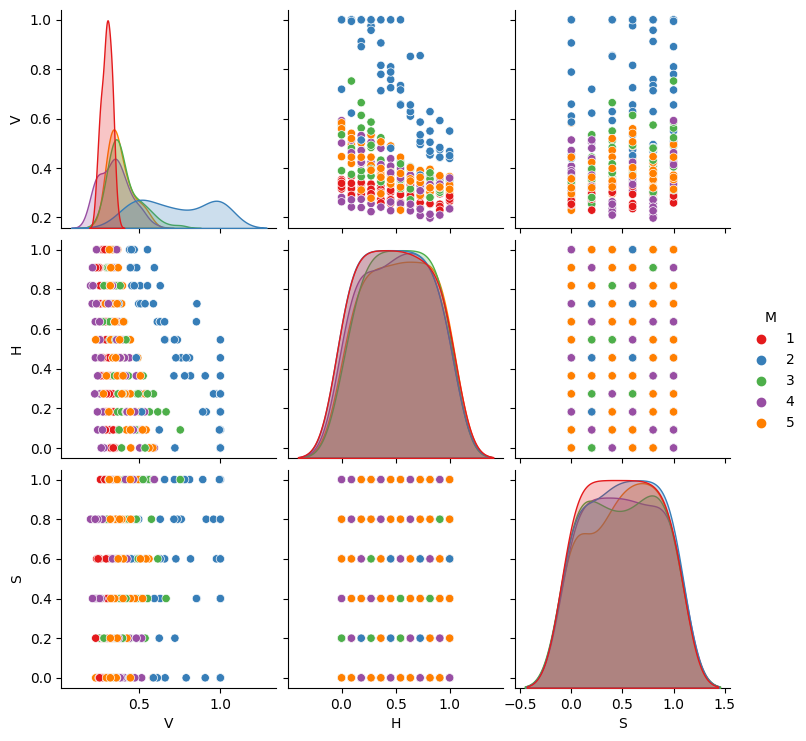

In [168]:
# Se hace un analisis de la relacion entre las variables del dataset original
sns.pairplot(data, hue="M", palette="Set1")

A partir del gráfico anterior, se observa una correlación notable entre las características, lo que dificulta la distinción inmediata entre las clases. Es evidente que los datos presentan una alta dispersión, lo que hace que la separación de las clases no sea evidente a simple vista.

## Transformación y Visualización de Datos mediante Principal Components Analysis (PCA)

En esta sección, llevamos a cabo el análisis de componentes principales con el objetivo de explorar las relaciones entre las variables en un espacio latente. Este proceso nos permite visualizar las componentes más significativas de nuestros datos.


En este análisis, se emplean las tres primeras componentes principales, y se calcula la varianza de cada una de ellas para determinar su importancia.





In [169]:
# Analisis de PCA con 3 componentes
pca = PCA(n_components=3)
pca_transformado= pca.fit_transform(data)
pca_var = pca.explained_variance_ratio_
print(pca_transformado.shape)

(338, 3)


In [170]:
#Mis 3 componentes con PCA
pca_transformado

array([[-1.95735254, -0.44786508,  0.48374211],
       [-1.9552462 , -0.46949358,  0.30743333],
       [-1.95369758, -0.48249435,  0.21154266],
       ...,
       [ 2.05004112,  0.48741593, -0.00688201],
       [ 2.05246716,  0.45821009, -0.25989237],
       [ 2.05606477,  0.42383389, -0.53119638]])

In [171]:
# Se mira la varianza de las nuevas componentes
print("Varianza de cada componente:",pca_var)
print("Sumatoria de la varianza de todas las componentes",sum(pca_var))

Varianza de cada componente: [0.88990557 0.05251656 0.04454201]
Sumatoria de la varianza de todas las componentes 0.9869641407786658


## Creación de nuevo dataset

Se crea un nuevo dataset utilizando las tres componentes principales obtenidas mediante PCA y se incorporan las etiquetas correspondientes para generar un conjunto de datos revisado.

In [172]:
# Personalizar etiquetas para columnas
Columns = ['Componente 1', 'Componente 2',"Componente 3"]

# Convertir el arreglo NumPy a un DataFrame con etiquetas personalizadas
data_pca = pd.DataFrame(pca_transformado, columns=Columns)

# Agregar etiquetas
data_pca["Label"]= np.array(data.iloc[:, 3])

#Guardar el nuevo conjunto de datos
data_pca.to_csv('Datos_PCA.csv', index=False)
data_pca

,Componente 1,Componente 2,Componente 3,Label
0,-1.957353,-0.447865,0.483742,1
1,-1.955246,-0.469494,0.307433,1
2,-1.953698,-0.482494,0.211543,1
3,-1.951330,-0.505277,0.031151,1
4,-1.950593,-0.514694,-0.052059,1
...,...,...,...,...
333,2.052363,-0.159241,-0.363012,5
334,2.045580,0.525602,0.277902,5
335,2.050041,0.487416,-0.006882,5
336,2.052467,0.458210,-0.259892,5


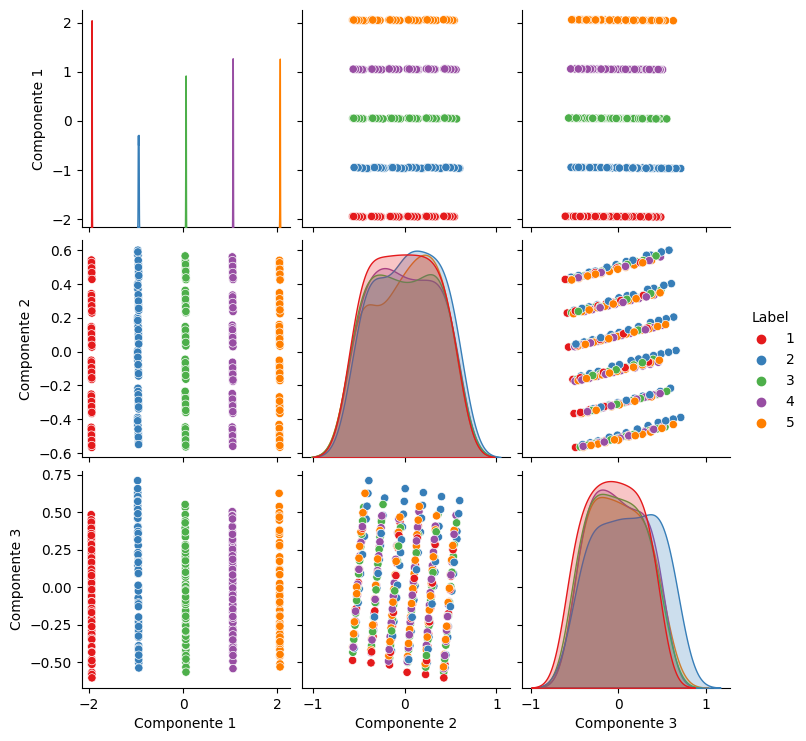

In [173]:
# Pairplot para un nuevo analisis con las tres componentes principales
sns.pairplot(data_pca, hue="Label", palette="Set1")

Al aplicar PCA, se nota que la primera componente retiene una gran cantidad de varianza, alcanzando un 88.24%, lo que indica su relevancia en el análisis. Observando la primera gráfica, podemos inferir que al preservar la mayor parte de la información en nuestro nuevo espacio latente de transformación, las otras dos componentes tienen un aporte al modelo despreciable. Por lo tanto, es posible realizar clustering y clasificación con solo esta componente principal.

Esto implica la transición desde el uso de las tres características originales del conjunto de datos a la utilización de solo una componente de PCA.

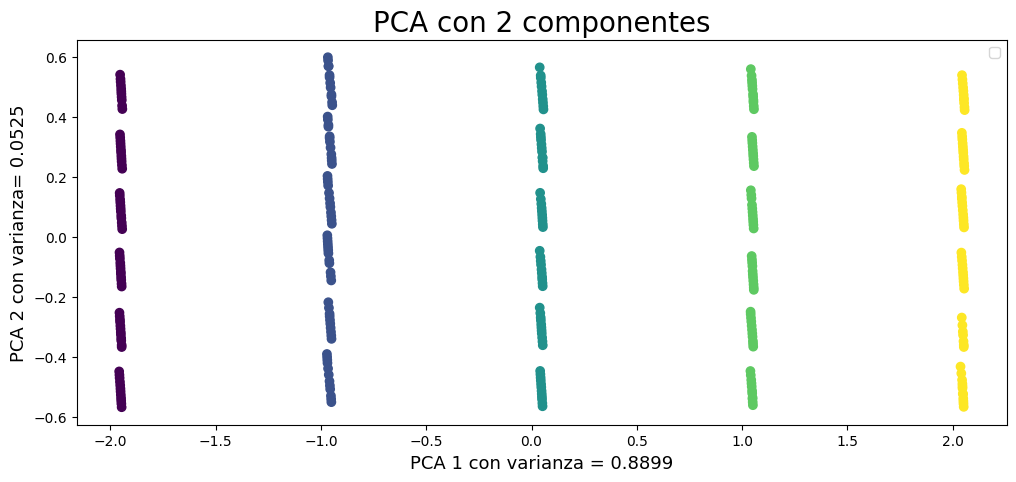

In [174]:
# Gráfica de las 2 primeras componentes del PCA
plt.figure(figsize=(12,5))
plt.scatter(data_pca['Componente 1'],data_pca['Componente 2'],c=data_pca["Label"])
plt.title("PCA con 2 componentes",fontsize=20)
plt.xlabel("PCA 1 con varianza = {}".format(round(pca_var[0],4)),fontsize=13)
plt.ylabel("PCA 2 con varianza= {}".format(round(pca_var[1],4)),fontsize=13)
plt.legend(loc="best")

Se puede observar que la primera componente desempeña un papel crucial en la clasificación de las clases, ya que aporta una cantidad significativa de información en un espacio latente de solo dos componentes.

Basándonos en nuestro análisis de los datos y las componentes principales, la discriminación de variables y la exploración de datos, hemos decidido utilizar únicamente la primera componente de PCA para alimentar un modelo de inteligencia artificial y llevar a cabo la clasificación o agrupamiento de las cinco clases.